# Credit Risk Analysis Project
## This project shows an end-to-end AI-driven credit risk assessment system.

## Objective
The goal of this project is to build a binary classification model that predicts whether a customer will default on their credit payment.

## Dataset
The dataset contains demographic information, historical billing amounts, payment behavior, and default labels.

## Problem Type
Binary Classification (Default / Non-Default)

## Key Challenges
- Class imbalance
- Outliers in financial variables
- Risk of data leakage during preprocessing

## Evaluation Strategy
Since this is a credit risk problem, model performance will be evaluated using:
- ROC-AUC
- Precision / Recall
- Confusion Matrix

Accuracy alone is not considered sufficient due to class imbalance.


In [241]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.4f}")


In [242]:
#import data
df = pd.read_csv("credit_card.csv")
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   

## EDA — Exploratory Data Analysis

The target variable is imbalanced, where about 22% of customers default and 78% do not default.

In [136]:
target = 'default payment_next_month'
# Target distribution
df[target].value_counts(normalize=True)


default payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [137]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment_next_month    0
dtype: int64

### The dataset contains no missing values, so no additional data cleaning is required at this stage.

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [139]:
# Age distribution summary
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [140]:
# Detect unrealistic ages
df[df['AGE'] < 18]['AGE'].count(), df[df['AGE'] > 80]['AGE'].count()


(0, 0)

In [144]:
# Check unique values
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [145]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

### Unknown or undefined categories in education and marital status are grouped into an "Other" category to improve data consistency.

In [146]:
# Replace unknown categories with 'Other'
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [142]:
# Credit limit summary
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

### Extreme credit limits are checked, and a log transformation is applied to reduce skewness in the credit limit variable.

In [143]:
# Identify extreme high limits
df[df['LIMIT_BAL'] > 1000000].shape
# Log transform for skewed distribution
df['LIMIT_BAL_log'] = np.log1p(df['LIMIT_BAL'])


(0, 25)

### Negative bill amounts are set to zero to ensure valid and realistic billing values.

In [147]:
# Count negative bill amounts
negative_bills = (df[[f'BILL_AMT{i}' for i in range(1,7)]] < 0).sum()

negative_bills


BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
dtype: int64

In [148]:
# Replace negative bill amounts with zero
for i in range(1,7):
    df[f'BILL_AMT{i}'] = df[f'BILL_AMT{i}'].clip(lower=0)


### The payment-to-bill ratio is calculated to understand how much of the billed amount is actually paid by the customer.

In [149]:
# Payment amounts summary
df[[f'PAY_AMT{i}' for i in range(1,7)]].describe().T
# Payment to bill ratio check
payment_bill_ratio = df['PAY_AMT1'] / (df['BILL_AMT1'] + 1)

payment_bill_ratio.describe()


count     30000.000000
mean        268.603152
std        5362.788550
min           0.000000
25%           0.035270
50%           0.057436
75%           0.295318
max      505000.000000
dtype: float64

### The number of delayed payment months is calculated for each customer to measure payment behavior over time.

In [129]:
df.shape

(30000, 25)

In [134]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment_next_month'],
      dtype='object')

# 📊 Dataset Column Descriptions
## 🔹 Customer Information
- ID : Unique identifier for each customer.
- LIMIT_BAL : Total credit limit assigned to the customer (in NT dollars).
- SEX : Gender of the customer:
    1 = Male
    2 = Female
- EDUCATION : Education level of the customer:
    1 = Graduate school
    2 = University 
    3 = High school 
    4 = Others 
    0, 5, 6 = Unknown / Not specified
- MARRIAGE : Marital status of the customer:
    1 = Married  
    2 = Single    
    3 = Others    
    0 = Unknown
- AGE : Age of the customer in years.
  
## 🔹 Repayment Status (Payment Delays)
- PAY_0 : Repayment status of the most recent month:
    -2 = No consumption
    -1 = Paid in full
    0 = Paid on time
    1 = Payment delay for one month
    2 = Payment delay for two months
    3–8 = Payment delay for three to eight months
- PAY_2 – PAY_6 : Repayment status for previous months (from 2 to 6 months ago),
following the same coding scheme as PAY_0.

## 🔹 Billing Amounts
- BILL_AMT1 – BILL_AMT6 : Monthly bill statement amounts for the past six months.

## 🔹 Payment Amounts
- PAY_AMT1 – PAY_AMT6 : Amounts paid by the customer in the past six months.

## 🔹 Target Variable
- default payment_next_month : Indicates whether the customer defaulted in the following month:
    1 = Default
    0 = No default


In [131]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment_next_month'],
      dtype='object')

In [14]:
df['default payment_next_month'].value_counts(normalize=True)


default payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [15]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment_next_month    0
dtype: int64

In [16]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [18]:
# Target distribution
target_dist = df['default payment_next_month'].value_counts(normalize=True)

target_dist


default payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [19]:
# Age distribution summary
df['AGE'].describe()


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [21]:
# Check unique values
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [22]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [23]:
# Replace unknown categories with 'Other'
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)


In [24]:
# Credit limit summary
df['LIMIT_BAL'].describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [25]:
# Log transform for skewed distribution
df['LIMIT_BAL_log'] = np.log1p(df['LIMIT_BAL'])


In [26]:
# Count negative bill amounts
negative_bills = (df[[f'BILL_AMT{i}' for i in range(1,7)]] < 0).sum()

negative_bills


BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
dtype: int64

In [27]:
# Replace negative bill amounts with zero
for i in range(1,7):
    df[f'BILL_AMT{i}'] = df[f'BILL_AMT{i}'].clip(lower=0)

In [28]:
# Payment amounts summary
df[[f'PAY_AMT{i}' for i in range(1,7)]].describe().T


,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_AMT5,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_AMT6,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0


In [29]:
# Payment to bill ratio check
payment_bill_ratio = df['PAY_AMT1'] / (df['BILL_AMT1'] + 1)

payment_bill_ratio.describe()


count     30000.000000
mean        268.603152
std        5362.788550
min           0.000000
25%           0.035270
50%           0.057436
75%           0.295318
max      505000.000000
dtype: float64

## CAPPING (WINSORIZATION)

In [30]:
# Cap extreme ratios at 99th percentile
cap_value = payment_bill_ratio.quantile(0.99)

df['payment_bill_ratio_capped'] = payment_bill_ratio.clip(upper=cap_value)


## BINARY FEATURE 

In [32]:
# Binary indicator for full or over payment
df['full_payment_flag'] = (df['PAY_AMT1'] >= df['BILL_AMT1']).astype(int)


In [33]:
# Payment discipline score
df['payment_discipline'] = np.where(
    df['payment_bill_ratio_capped'] >= 1, 1,
    df['payment_bill_ratio_capped']
)


In [34]:
df['payment_bill_ratio_capped'].describe()


count    30000.000000
mean        51.042602
std        351.243257
min          0.000000
25%          0.035270
50%          0.057436
75%          0.295318
max       3056.390000
Name: payment_bill_ratio_capped, dtype: float64

## HARD CAP

In [35]:
# Hard cap based on business logic
df['payment_bill_ratio_capped'] = payment_bill_ratio.clip(upper=5)


In [36]:
df['payment_bill_ratio_capped'].describe()


count    30000.000000
mean         0.565688
std          1.252934
min          0.000000
25%          0.035270
50%          0.057436
75%          0.295318
max          5.000000
Name: payment_bill_ratio_capped, dtype: float64

In [37]:
# Bucket payment behavior into risk bands
def payment_bucket(x):
    if x == 0:
        return 0    # No payment
    elif x < 0.3:
        return 1    # Very weak
    elif x < 0.7:
        return 2    # Partial
    elif x < 1:
        return 3    # Near full
    else:
        return 4    # Full or over payment

df['payment_bucket'] = df['payment_bill_ratio_capped'].apply(payment_bucket)


In [38]:
df['full_payment_flag'] = (
    (df['PAY_AMT1'] >= df['BILL_AMT1']) & (df['BILL_AMT1'] > 0)
).astype(int)


In [39]:
df['payment_bill_ratio_capped'].describe()


count    30000.000000
mean         0.565688
std          1.252934
min          0.000000
25%          0.035270
50%          0.057436
75%          0.295318
max          5.000000
Name: payment_bill_ratio_capped, dtype: float64

In [40]:
# Distribution of delay status
df['PAY_0'].value_counts().sort_index()


PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

In [41]:
# Create binary delay indicator
df['has_delay'] = (df['PAY_0'] > 0).astype(int)

df['has_delay'].value_counts(normalize=True)


has_delay
0    0.772733
1    0.227267
Name: proportion, dtype: float64

In [42]:
# Delay severity distribution
df[df['PAY_0'] > 0]['PAY_0'].value_counts().sort_index()


PAY_0
1    3688
2    2667
3     322
4      76
5      26
6      11
7       9
8      19
Name: count, dtype: int64

In [44]:
# Default rate by delay presence
df.groupby('has_delay')['default payment_next_month'].mean()


has_delay
0    0.138340
1    0.502933
Name: default payment_next_month, dtype: float64

In [46]:
# Default rate by delay length
df.groupby('PAY_0')['default payment_next_month'].mean().sort_index()


PAY_0
-2    0.132294
-1    0.167781
 0    0.128113
 1    0.339479
 2    0.691414
 3    0.757764
 4    0.684211
 5    0.500000
 6    0.545455
 7    0.777778
 8    0.578947
Name: default payment_next_month, dtype: float64

In [47]:
# Delay risk band (EDA-level)
def delay_band(x):
    if x <= 0:
        return 0   # No delay
    elif x == 1:
        return 1   # Mild delay
    elif x == 2:
        return 2   # Medium delay
    else:
        return 3   # Severe delay

df['delay_band'] = df['PAY_0'].apply(delay_band)

df['delay_band'].value_counts()


delay_band
0    23182
1     3688
2     2667
3      463
Name: count, dtype: int64

In [48]:
# Delay columns
delay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [49]:
# Number of months with delay (>0)
df['num_delay_months'] = (df[delay_cols] > 0).sum(axis=1)

df['num_delay_months'].value_counts().sort_index()


num_delay_months
0    19931
1     4426
2     1899
3     1154
4      951
5      298
6     1341
Name: count, dtype: int64

In [50]:
# Maximum delay across months
df['max_delay'] = df[delay_cols].max(axis=1)

df['max_delay'].value_counts().sort_index()


max_delay
-2     2109
-1     3086
 0    14736
 1     1689
 2     7187
 3      789
 4      218
 5       69
 6       25
 7       67
 8       25
Name: count, dtype: int64

In [52]:
# Default rate by number of delayed months
df.groupby('num_delay_months')['default payment_next_month'].mean()


num_delay_months
0    0.117104
1    0.298238
2    0.387572
3    0.508666
4    0.573081
5    0.573826
6    0.703207
Name: default payment_next_month, dtype: float64

In [54]:
# Default rate by max delay
df.groupby('max_delay')['default payment_next_month'].mean().sort_index()


max_delay
-2    0.134661
-1    0.147116
 0    0.108306
 1    0.249852
 2    0.435509
 3    0.622307
 4    0.642202
 5    0.507246
 6    0.560000
 7    0.835821
 8    0.560000
Name: default payment_next_month, dtype: float64

In [55]:
# Simple delay behavior summary
df[['num_delay_months', 'max_delay']].describe()


,num_delay_months,max_delay
count,30000.000000,30000.000000
mean,0.834200,0.438733
std,1.554303,1.345154
min,0.000000,-2.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,2.000000
max,6.000000,8.000000


### FEATURE ENGINEERING

In [56]:
# Delay score calculation
def weighted_delay_score(row):
    score = 0
    for col in delay_cols:
        if row[col] == 1:
            score += 1
        elif row[col] == 2:
            score += 2
        elif row[col] >= 3:
            score += 3
    return score

df['delay_score'] = df.apply(weighted_delay_score, axis=1)

df['delay_score'].describe()


count    30000.000000
mean         1.622333
std          3.246514
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         18.000000
Name: delay_score, dtype: float64

In [57]:
# Chronic delay flag
df['chronic_delay_flag'] = (df['num_delay_months'] >= 2).astype(int)

df['chronic_delay_flag'].value_counts()


chronic_delay_flag
0    24357
1     5643
Name: count, dtype: int64

In [58]:
# Credit utilization ratio
df['credit_utilization'] = df['BILL_AMT1'] / df['LIMIT_BAL']

df['credit_utilization'].describe()


count    30000.000000
mean         0.423938
std          0.411252
min          0.000000
25%          0.022032
50%          0.313994
75%          0.829843
max          6.455300
Name: credit_utilization, dtype: float64

In [59]:
df['credit_utilization_capped'] = df['credit_utilization'].clip(upper=1.5)


In [60]:
feature_cols = [
    'delay_score',
    'chronic_delay_flag',
    'credit_utilization_capped',
    'payment_bucket',
    'full_payment_flag'
]


In [61]:
df['risk_score_raw'] = (
    df['delay_score'] * 3 +
    df['chronic_delay_flag'] * 5 +
    df['credit_utilization_capped'] * 2 -
    df['payment_bucket'] * 1 -
    df['full_payment_flag'] * 2
)


# 1️⃣ CAPPING (WINSORIZATION)

In [247]:
# Cap extreme ratios at 99th percentile
cap_value = payment_bill_ratio.quantile(0.99)

df['payment_bill_ratio_capped'] = payment_bill_ratio.clip(upper=cap_value)
# Binary indicator for full or over payment
df['full_payment_flag'] = (df['PAY_AMT1'] >= df['BILL_AMT1']).astype(int)
# Payment discipline score
df['payment_discipline'] = np.where(
    df['payment_bill_ratio_capped'] >= 1, 1,
    df['payment_bill_ratio_capped']
)


In [248]:
df['payment_bill_ratio_capped'].describe()


count   30000.0000
mean       51.0426
std       351.2433
min         0.0000
25%         0.0353
50%         0.0574
75%         0.2953
max      3056.3900
Name: payment_bill_ratio_capped, dtype: float64

In [249]:
# Hard cap based on business logic
df['payment_bill_ratio_capped'] = payment_bill_ratio.clip(upper=5)
df['payment_bill_ratio_capped'].describe()


count   30000.0000
mean        0.5657
std         1.2529
min         0.0000
25%         0.0353
50%         0.0574
75%         0.2953
max         5.0000
Name: payment_bill_ratio_capped, dtype: float64

In [250]:
# Bucket payment behavior into risk bands
def payment_bucket(x):
    if x == 0:
        return 0    # No payment
    elif x < 0.3:
        return 1    # Very weak
    elif x < 0.7:
        return 2    # Partial
    elif x < 1:
        return 3    # Near full
    else:
        return 4    # Full or over payment

df['payment_bucket'] = df['payment_bill_ratio_capped'].apply(payment_bucket)


In [251]:
# Count number of months with delay
df['num_delays'] = (df[[f'PAY_{i}' for i in [0,2,3,4,5,6]]] > 0).sum(axis=1)

df['num_delays'].value_counts()


num_delays
0    19931
1     4426
2     1899
6     1341
3     1154
4      951
5      298
Name: count, dtype: int64

### The default rate is analyzed by the number of delayed payments to observe the relationship between delays and default risk.

## Payment delays are grouped into risk bands to simplify delay severity analysis.

In [252]:
# Default rate by number of delays
df.groupby('num_delays')['default payment_next_month'].mean()


num_delays
0   0.1171
1   0.2982
2   0.3876
3   0.5087
4   0.5731
5   0.5738
6   0.7032
Name: default payment_next_month, dtype: float64

In [253]:
# Create binary delay indicator
df['has_delay'] = (df['PAY_0'] > 0).astype(int)
df['has_delay'].value_counts(normalize=True)
# Delay severity distribution
df[df['PAY_0'] > 0]['PAY_0'].value_counts().sort_index()
# Default rate by delay presence
df.groupby('has_delay')['default payment_next_month'].mean()


has_delay
0   0.1383
1   0.5029
Name: default payment_next_month, dtype: float64

In [254]:
# Default rate by delay length
df.groupby('PAY_0')['default payment_next_month'].mean().sort_index()


PAY_0
-2   0.1323
-1   0.1678
 0   0.1281
 1   0.3395
 2   0.6914
 3   0.7578
 4   0.6842
 5   0.5000
 6   0.5455
 7   0.7778
 8   0.5789
Name: default payment_next_month, dtype: float64

In [255]:
# Delay risk band 
def delay_band(x):
    if x <= 0:
        return 0   # No delay
    elif x == 1:
        return 1   # Mild delay
    elif x == 2:
        return 2   # Medium delay
    else:
        return 3   # Severe delay

df['delay_band'] = df['PAY_0'].apply(delay_band)

df['delay_band'].value_counts()


delay_band
0    23182
1     3688
2     2667
3      463
Name: count, dtype: int64

## The total number of delayed months and the maximum delay are calculated to better capture overall payment risk.

In [256]:
# Delay columns
delay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# Number of months with delay (>0)
df['num_delay_months'] = (df[delay_cols] > 0).sum(axis=1)
df['num_delay_months'].value_counts().sort_index()
# Maximum delay across months
df['max_delay'] = df[delay_cols].max(axis=1)
df['max_delay'].value_counts().sort_index()


max_delay
-2     2109
-1     3086
 0    14736
 1     1689
 2     7187
 3      789
 4      218
 5       69
 6       25
 7       67
 8       25
Name: count, dtype: int64

## Default risk is analyzed by delay frequency, and summary statistics are used to understand overall delay behavior.

In [257]:
# Default rate by number of delayed months
df.groupby('num_delay_months')['default payment_next_month'].mean()
# Default rate by number of delayed months
df.groupby('num_delay_months')['default payment_next_month'].mean()
# Simple delay behavior summary
df[['num_delay_months', 'max_delay']].describe()


,num_delay_months,max_delay
count,30000.0000,30000.0000
mean,0.8342,0.4387
std,1.5543,1.3452
min,0.0000,-2.0000
25%,0.0000,0.0000
50%,0.0000,0.0000
75%,1.0000,2.0000
max,6.0000,8.0000


# Feature Engineering

In [258]:
# Delay score calculation
def weighted_delay_score(row):
    score = 0
    for col in delay_cols:
        if row[col] == 1:
            score += 1
        elif row[col] == 2:
            score += 2
        elif row[col] >= 3:
            score += 3
    return score

df['delay_score'] = df.apply(weighted_delay_score, axis=1)

df['delay_score'].describe()


count   30000.0000
mean        1.6223
std         3.2465
min         0.0000
25%         0.0000
50%         0.0000
75%         2.0000
max        18.0000
Name: delay_score, dtype: float64

In [259]:
# Chronic delay flag
df['chronic_delay_flag'] = (df['num_delay_months'] >= 2).astype(int)

df['chronic_delay_flag'].value_counts()


chronic_delay_flag
0    24357
1     5643
Name: count, dtype: int64

In [260]:
# Credit utilization ratio
df['credit_utilization'] = df['BILL_AMT1'] / df['LIMIT_BAL']

df['credit_utilization'].describe()


count   30000.0000
mean        0.4238
std         0.4115
min        -0.6199
25%         0.0220
50%         0.3140
75%         0.8298
max         6.4553
Name: credit_utilization, dtype: float64

In [261]:
df['credit_utilization_capped'] = df['credit_utilization'].clip(upper=1.5)


# ML MODELS

TARGET & FEATURE SET

In [262]:
feature_cols = [
    'delay_score',
    'chronic_delay_flag',
    'credit_utilization_capped',
    'payment_bucket',
    'full_payment_flag'
]
X = df[feature_cols]
y = df[target]

In [263]:
X.describe()

,delay_score,chronic_delay_flag,credit_utilization_capped,payment_bucket,full_payment_flag
count,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000
mean,1.6223,0.1881,0.4211,1.3930,0.2156
std,3.2465,0.3908,0.3997,1.2236,0.4113
min,0.0000,0.0000,-0.6199,0.0000,0.0000
25%,0.0000,0.0000,0.0220,1.0000,0.0000
50%,0.0000,0.0000,0.3140,1.0000,0.0000
75%,2.0000,0.0000,0.8298,1.0000,0.0000
max,18.0000,1.0000,1.5000,4.0000,1.0000


In [264]:
from sklearn.model_selection import train_test_split

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Check target distribution
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(default payment_next_month
 0   0.7788
 1   0.2212
 Name: proportion, dtype: float64,
 default payment_next_month
 0   0.7788
 1   0.2212
 Name: proportion, dtype: float64)

In [265]:
numeric_features = X_train.columns.tolist()


In [266]:
preprocess_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)


In [267]:
model_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess_pipeline),
        (
            "model",
            LogisticRegression(
                max_iter=1000,
                class_weight="balanced",
                random_state=42
            ),
        ),
    ]
)


In [268]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [269]:
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [270]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5841
           1       0.45      0.55      0.49      1659

    accuracy                           0.75      7500
   macro avg       0.66      0.68      0.66      7500
weighted avg       0.77      0.75      0.76      7500



In [271]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc


0.7400272377745023

ROC-AUC is used as the primary evaluation metric since it measures
the model's ability to rank defaulters higher than non-defaulters
independent of a fixed classification threshold.


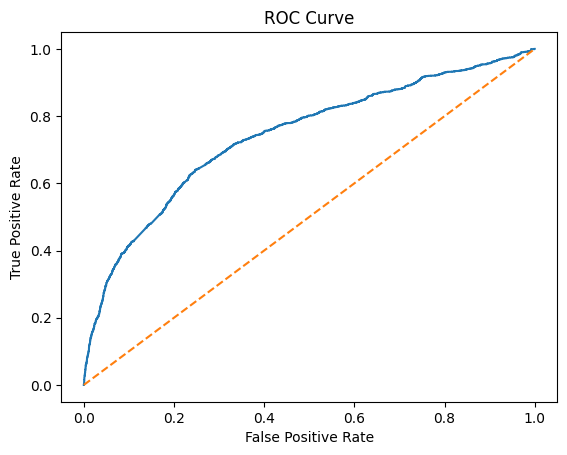

In [272]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


## Conclusion

In this project, a logistic regression model was developed to predict credit default risk.

Key points:
- Feature engineering was guided by domain assumptions
- Data leakage was prevented using a train-test split before preprocessing
- A pipeline-based approach ensured reproducibility
- ROC-AUC was used as the primary evaluation metric

This project demonstrates an end-to-end credit risk modeling workflow
aligned with industry best practices.


In [274]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions with optimal threshold
y_test_pred_opt = (y_test_proba >= 0.15922198655199363).astype(int)

# Confusion matrix
confusion_matrix(y_test, y_test_pred_opt)


array([[   0, 5841],
       [   0, 1659]])

In [275]:
classification_report(y_test, y_test_pred_opt)


/Users/semakonur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/semakonur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/semakonur/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      5841\n           1       0.22      1.00      0.36      1659\n\n    accuracy                           0.22      7500\n   macro avg       0.11      0.50      0.18      7500\nweighted avg       0.05      0.22      0.08      7500\n'

# COEFFICIENT ANALYSIS & EXPLAINABILITY

In [276]:
coef_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': log_reg.coef_[0]
})

# Odds ratio for business interpretation
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])

coef_df.sort_values(by='coefficient', ascending=False)

,feature,coefficient,odds_ratio
0,delay_score,0.7948,2.2139
1,chronic_delay_flag,0.2395,1.2706
2,credit_utilization_capped,0.0701,1.0726
6,sustainable_payment_score,0.0254,1.0257
5,full_payment_months_6m,0.0210,1.0212
4,avg_payment_ratio_6m,0.0103,1.0104
3,payment_bucket,-0.0843,0.9191


full_payment_flag!!

In [277]:
# Average payment ratio over last 6 months
pay_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

df['avg_payment_ratio_6m'] = (
    df[pay_cols].sum(axis=1) /
    (df[bill_cols].sum(axis=1) + 1)
)

# Hard cap for stability
df['avg_payment_ratio_6m'] = df['avg_payment_ratio_6m'].clip(0, 3)

df['avg_payment_ratio_6m'].describe()


count   30000.0000
mean        0.3643
std         0.5198
min        -0.0000
25%         0.0411
50%         0.0862
75%         0.5982
max         3.0000
Name: avg_payment_ratio_6m, dtype: float64

### CONSISTENT FULL PAYMENT FLAG

In [278]:
# Monthly payment ratios
payment_ratios = df[pay_cols].values / (df[bill_cols].values + 1)

# Count months with near-full payment
df['full_payment_months_6m'] = (payment_ratios >= 0.9).sum(axis=1)

df['full_payment_months_6m'].value_counts().sort_index()


/var/folders/6x/5765ct_d2558d6np855wqhhh0000gn/T/ipykernel_59508/2875085028.py:2: RuntimeWarning: divide by zero encountered in divide
  payment_ratios = df[pay_cols].values / (df[bill_cols].values + 1)
/var/folders/6x/5765ct_d2558d6np855wqhhh0000gn/T/ipykernel_59508/2875085028.py:2: RuntimeWarning: invalid value encountered in divide
  payment_ratios = df[pay_cols].values / (df[bill_cols].values + 1)


full_payment_months_6m
0    18221
1     4004
2     3003
3     2640
4     1391
5      503
6      238
Name: count, dtype: int64

### SUSTAINABLE PAYMENT SCORE

In [279]:
df['sustainable_payment_score'] = (
    0.6 * df['avg_payment_ratio_6m'] +
    0.4 * (df['full_payment_months_6m'] / 6)
)

df['sustainable_payment_score'].describe()


count   30000.0000
mean        0.2795
std         0.3833
min         0.0000
25%         0.0248
50%         0.0551
75%         0.4910
max         2.2000
Name: sustainable_payment_score, dtype: float64

## Update Feature Set

In [280]:
features = [
    'delay_score',
    'chronic_delay_flag',
    'credit_utilization_capped',
    'payment_bucket',
    'avg_payment_ratio_6m',
    'full_payment_months_6m',
    'sustainable_payment_score'
]

X = df[features]
y = df['default payment_next_month']


In [281]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [282]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scale_cols = [
    'delay_score',
    'credit_utilization_capped',
    'avg_payment_ratio_6m',
    'sustainable_payment_score'
]

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])


In [283]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='lbfgs'
)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [284]:
from sklearn.metrics import roc_auc_score

y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_test_proba)


0.7338456437362253

In [285]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
ks = tpr - fpr
optimal_idx = ks.argmax()

optimal_threshold = thresholds[optimal_idx]
optimal_threshold, ks[optimal_idx]


(0.40305212174368965, 0.38280806656691657)

In [286]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_opt = (y_test_proba >= optimal_threshold).astype(int)

confusion_matrix(y_test, y_pred_opt)
classification_report(y_test, y_pred_opt)


'              precision    recall  f1-score   support\n\n           0       0.88      0.76      0.81      5841\n           1       0.42      0.62      0.50      1659\n\n    accuracy                           0.73      7500\n   macro avg       0.65      0.69      0.66      7500\nweighted avg       0.78      0.73      0.75      7500\n'

In [287]:
coef_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': log_reg.coef_[0]
})

coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])

coef_df.sort_values(by='coefficient', ascending=False)


,feature,coefficient,odds_ratio
0,delay_score,0.7951,2.2147
1,chronic_delay_flag,0.2387,1.2696
2,credit_utilization_capped,0.0700,1.0725
5,full_payment_months_6m,0.0455,1.0465
6,sustainable_payment_score,0.0167,1.0168
4,avg_payment_ratio_6m,-0.0075,0.9925
3,payment_bucket,-0.0904,0.9136


# CHALLENGER MODEL — RANDOM FOREST (BENCHMARK)

In [288]:
features = [
    'delay_score',
    'chronic_delay_flag',
    'credit_utilization_capped',
    'payment_bucket',
    'avg_payment_ratio_6m',
    'full_payment_months_6m',
    'sustainable_payment_score'
]

X = df[features]
y = df['default payment_next_month']


In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [290]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=200,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=200, n_estimators=300, random_state=42)

In [291]:
from sklearn.metrics import roc_auc_score

y_test_proba_rf = rf.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_test_proba_rf)


0.7560955020727602

In [292]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_rf)
ks = tpr - fpr

optimal_idx = ks.argmax()
optimal_threshold_rf = thresholds[optimal_idx]

optimal_threshold_rf, ks[optimal_idx]


(0.5220310641670031, 0.39946125056616366)

In [293]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rf = (y_test_proba_rf >= optimal_threshold_rf).astype(int)

confusion_matrix(y_test, y_pred_rf)
classification_report(y_test, y_pred_rf)


'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.83      5841\n           1       0.45      0.62      0.52      1659\n\n    accuracy                           0.75      7500\n   macro avg       0.66      0.70      0.67      7500\nweighted avg       0.78      0.75      0.76      7500\n'

## SHAP 

### SHAP is used to explain why a machine learning model makes a certain prediction by showing how each feature affects the final result.

In [ ]:
import shap

explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)


 66%|=============       | 9849/15000 [00:49<00:25]       

In [ ]:
shap.plots.bar(shap_values[:, :, 1])



# GENAI 

After building the credit risk model, Generative AI is used to convert model outputs and SHAP values into clear, human-readable explanations.
Instead of only showing technical scores, the LLM interprets key risk drivers and explains why a customer is classified as high or low risk in simple language.
This approach improves model transparency and helps non-technical users, such as bank analysts, better understand and trust the predictions.

In [ ]:
# Select one customer from test set
idx = 0  # you can change this later


In [225]:
# Predicted probability of default
pd_score = rf.predict_proba(X_test.iloc[[idx]])[0, 1]
pd_score

0.7489434015913813

### A PD score of 0.74 means the model estimates a 74% probability that the customer will default in the next month.

In [226]:
# SHAP values for the selected observation
customer_shap = shap_values[idx, :, 1]

In [227]:
# Create explanation DataFrame
explanation_df = pd.DataFrame({
    "feature": X_test.columns,
    "shap_value": customer_shap.values,
    "feature_value": X_test.iloc[idx].values
})


In [228]:
# Select top features by absolute SHAP value
top_features = (
    explanation_df
    .assign(abs_shap=lambda x: x["shap_value"].abs())
    .sort_values("abs_shap", ascending=False)
    .head(5)
)


In [229]:
top_features

,feature,shap_value,feature_value,abs_shap
0,delay_score,0.140579,3.000000,0.140579
1,chronic_delay_flag,0.086077,1.000000,0.086077
6,sustainable_payment_score,0.028024,0.014038,0.028024
4,avg_payment_ratio_6m,0.027097,0.023396,0.027097
3,payment_bucket,0.022979,0.000000,0.022979


In [230]:
explanation_summary = []

for _, row in top_features.iterrows():
    direction = "increases risk" if row["shap_value"] > 0 else "reduces risk"
    
    explanation_summary.append({
        "feature": row["feature"],
        "feature_value": row["feature_value"],
        "impact": direction,
        "shap_value": round(row["shap_value"], 4)
    })


In [231]:
explanation_summary

[{'feature': 'delay_score',
  'feature_value': 3.0,
  'impact': 'increases risk',
  'shap_value': 0.1406},
 {'feature': 'chronic_delay_flag',
  'feature_value': 1.0,
  'impact': 'increases risk',
  'shap_value': 0.0861},
 {'feature': 'sustainable_payment_score',
  'feature_value': 0.014037556509612427,
  'impact': 'increases risk',
  'shap_value': 0.028},
 {'feature': 'avg_payment_ratio_6m',
  'feature_value': 0.023395927516020713,
  'impact': 'increases risk',
  'shap_value': 0.0271},
 {'feature': 'payment_bucket',
  'feature_value': 0.0,
  'impact': 'increases risk',
  'shap_value': 0.023}]

In [232]:
import os
os.environ["OPENAI_API_KEY"] = "YOUR_API_KEY"

In [233]:
from openai import OpenAI
client = OpenAI()


In [234]:
system_prompt = """
You are a senior credit risk analyst working at a state-owned commercial bank.

Your role is to provide clear, professional, and regulation-compliant explanations
of credit risk assessments to credit officers or customers.

Your task is strictly limited to explaining the key risk drivers provided to you.
You do NOT calculate risk.
You do NOT make approval or rejection decisions.
You do NOT provide financial or behavioral advice.
You do NOT mention machine learning models, SHAP, algorithms, or technical details.

You explain credit risk in neutral, factual, and objective banking language.

You will receive structured information consisting of:
- A probability of default (PD)
- A list of key contributing risk indicators

The risk indicators have the following meanings:

- delay_score:
  Higher values indicate more frequent and/or longer payment delays in recent periods.

- chronic_delay_flag:
  Indicates whether the customer has a history of repeated late payments over time.

- credit_utilization_capped:
  Represents the proportion of the available credit limit currently in use.
  Higher values suggest increased financial pressure.

- sustainable_payment_score:
  Measures the consistency and adequacy of repayments over time.
  Lower values indicate unstable or unsustainable payment behavior.

- avg_payment_ratio_6m:
  The average ratio of payments made to billed amounts over the last six months.
  Lower values indicate partial or insufficient repayments.

- payment_bucket:
  A categorical indicator summarizing recent payment behavior,
  where lower categories reflect weaker payment discipline.

When generating explanations:
- Focus on behavioral patterns rather than single events.
- Emphasize repayment consistency and financial discipline.
- Avoid judgmental, emotional, or accusatory language.
- Do not include numerical calculations unless explicitly provided.
- Keep explanations concise and professional (maximum 5 sentences).

Example:

Input:
Probability of default: 72%

Key contributing factors:
- delay_score is high
- chronic_delay_flag is present
- sustainable_payment_score is low

Output:
"The customer's credit risk is elevated due to a pattern of repeated payment delays.
The presence of chronic late payments indicates ongoing repayment difficulties.
Additionally, inconsistent payment sustainability suggests challenges
in maintaining regular and sufficient repayment behavior."

End of example.

"""


In [235]:
def build_user_prompt(pd_score, explanation_summary):
    prompt = f"""
Probability of default: {pd_score:.1%}

Key contributing risk indicators:
"""
    for item in explanation_summary:
        prompt += (
            f"- {item['feature']} has value {item['feature_value']} "
            f"and {item['impact']}.\n"
        )

    return prompt


In [236]:
user_prompt = build_user_prompt(pd_score, explanation_summary)
print(user_prompt)



Probability of default: 74.9%

Key contributing risk indicators:
- delay_score has value 3.0 and increases risk.
- chronic_delay_flag has value 1.0 and increases risk.
- sustainable_payment_score has value 0.014037556509612427 and increases risk.
- avg_payment_ratio_6m has value 0.023395927516020713 and increases risk.
- payment_bucket has value 0.0 and increases risk.



In [237]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    temperature=0.2,
    max_tokens=500
)


In [238]:
explanation_text = response.choices[0].message.content
print(explanation_text)


The customer's credit risk is elevated due to frequent and prolonged payment delays, as indicated by the delay score. The presence of a chronic delay flag suggests a history of repeated late payments, highlighting ongoing repayment challenges. The low sustainable payment score reflects inconsistent and potentially unsustainable repayment behavior. Additionally, the low average payment ratio over the past six months indicates insufficient repayments relative to billed amounts. The payment bucket value further underscores weak recent payment discipline.
